# Jarvis march algorithm

Use the cell below for all python code needed to realise the Jarvis march algorithm (including any auxiliary data structures and functions you might need). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [1]:
def jarvismarch(inputSet):
    
    numOfCoordinates = len(inputSet)
    
    # There must be at least 3 points for a convex hull
    if numOfCoordinates <= 2:
        return inputSet
    
    # Find top left coordinate
    leftPoint = leftMostPoint(inputSet)
        
    hull = counterclockwiseSearch(leftPoint, numOfCoordinates, inputSet)
        
    outputSet = []
    for coordinate in hull:
        outputSet.append((inputSet[coordinate][0], inputSet[coordinate][1]))
    
    return outputSet
    
def counterclockwiseSearch(leftPoint, numOfCoordinates, inputSet):
    
    p = leftPoint
    q = 0
    hull = []
    
    # Start from top left coordinate and move counterclockwise until all points have been looped.     
    while(True):
        
        hull.append(p) 
        
        q = (p + 1) % numOfCoordinates
        
        for i in range(numOfCoordinates):
            if (orientation(inputSet[p], inputSet[i], inputSet[q]) == 2):
                q = i
        p = q

        # Once you have looped all coordinates and p is now back at the left most point break out of the loop
        if (p == leftPoint):
            break
            
    return hull

def leftMostPoint(points):
    # Start off by finding the top left coordinate
    
    x_val = min([x[0] for x in points])

    minn = 0 
    for i in range(len(points)):
        if (points[i][0] == x_val) & (points[i][1] >= minn):
            minn = points[i][1]
            index = i
            
    return index

def orientation(x,y,z):   
    # Find the corientation of a triplet. 0 returns colinear, 1 return clockwise, 2 returns counterclockwise
    
    orientationVal = (y[1] - x[1]) * (z[0] - y[0]) - (y[0] - x[0]) * (z[1] - y[1])
    
    if orientationVal == 0:
        return 0
    elif orientationVal > 0:
        return 1
    else:
        return 2

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [2]:
import random

#code for random data generation
def randomDataGeneration(numberOfPoints):
     return [(random.randrange(0, 32767), random.randrange(0, 32767)) for i in range(numberOfPoints)]

# Code for worst case data generation
def worstCaseDataGeneration(numberOfPoints): 
    # Worst case sceanrio is when all pooints lie on the convex hull 
    numberOfPoints = numberOfPoints/2
    
    inputSet = []
    x = 0
    y = 0
    while y < numberOfPoints:
        while x < numberOfPoints:
            inputSet.append((x,y))
            x += 1
        inputSet.append((x,y))
        y += 1
        
    return inputSet


Use the cell below for all python code needed to test the `jarvismarch()` function on the data generated above.

In [3]:
import timeit

N = [100, 500, 1000, 5000, 10000, 15000,20000]

def randomDataTimeAnaysis():
    timeTaken = []

    for i in N:
        inputSet = randomDataGeneration(i)
        time = (timeit.timeit(lambda: jarvismarch(inputSet), number = 1))
        timeTaken.append(time)
        
    return timeTaken

def worstCaseDataAnaysis():
    timeTaken = []
    
    for i in N:
        inputSet = worstCaseDataGeneration(i)
        time = (timeit.timeit(lambda: jarvismarch(inputSet), number = 1))
        timeTaken.append(time)
        
    return timeTaken

randomDataTimeAnaysis()
worstCaseDataAnaysis()

[0.004395578000000011,
 0.11536224300000009,
 0.4948481330000001,
 12.304288537000001,
 49.437139466,
 108.69972062100001,
 198.22647205500002]

*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

In [8]:
inputSet = randomDataGeneration(100)
outputSet = jarvismarch(inputSet)

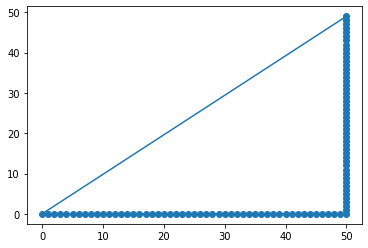

In [9]:
import matplotlib.pyplot as plt

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

#inputSet = [[1,1], [2,2] , [3, 3], [4,4], [1,4], [3,1], [1, 5], [2, 4], [3, 5]]
#outputSet = [[1,1], [3,1] , [4, 4], [3,5], [1,5]]

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 

plt.show() 